In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow, imsave
from skimage.transform import integral_image

### Convolution

task: https://stepik.org/lesson/61037/step/5

In [2]:
task_img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
integrated = np.pad(integral_image(task_img), (1, 0))
boxed = np.zeros((integrated.shape[0] - 5, integrated.shape[1] - 5), dtype="uint8")
for i in range(boxed.shape[0]):
    for j in range(boxed.shape[1]):
        a = integrated[i+5, j+5]
        b = integrated[i, j]
        c = integrated[i+5, j]
        d = integrated[i, j+5]
        boxed[i, j] += (a + b - c - d) // 25
answer = imread("https://stepik.org/media/attachments/lesson/61037/box-tiger.png")
np.array_equal(boxed, answer)

True

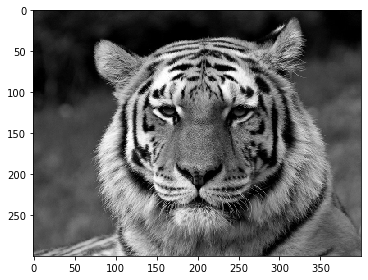

In [3]:
imshow(task_img)

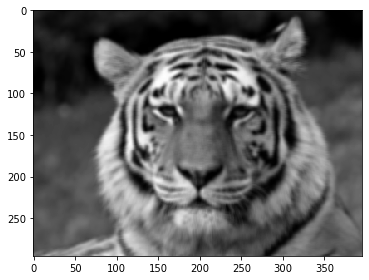

In [4]:
imshow(boxed)

task: https://stepik.org/lesson/61037/step/9

In [5]:
def gaussian_kernel(sigma):
    k = round(6 * sigma + 1)
    axis = np.linspace(-(k - 1.0) / 2.0, (k - 1.0) / 2.0, k)
    j, i = np.meshgrid(axis, axis)
    kernel = np.exp(-0.5 * (np.square(i) + np.square(j)) / np.square(sigma))
    kernel /= (2.0 * np.pi * np.square(sigma))
    return kernel / kernel.sum()

In [6]:
g = np.around(gaussian_kernel(sigma=0.33), 5)

In [7]:
for x in g:
    print(" ".join(f"{item:.5f}" for item in x))

0.00010 0.00974 0.00010
0.00974 0.96065 0.00974
0.00010 0.00974 0.00010


task: https://stepik.org/lesson/61037/step/10

In [8]:
task_img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
kernel = gaussian_kernel(sigma=0.66)
k = round(6 * 0.66 + 1)
filtered = np.zeros((task_img.shape[0] - k + 1, task_img.shape[1] - k + 1))
for i in range(filtered.shape[0]):
    for j in range(filtered.shape[1]):
        filtered[i, j] += (task_img[i:i+5, j:j+5] * kernel).sum()
filtered = np.clip(filtered, 0.0, 255.0).astype("uint8")

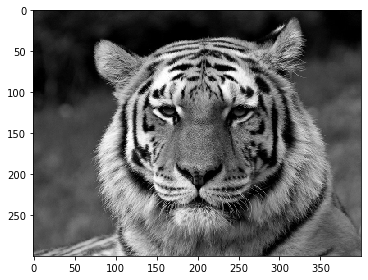

In [9]:
imshow(task_img)

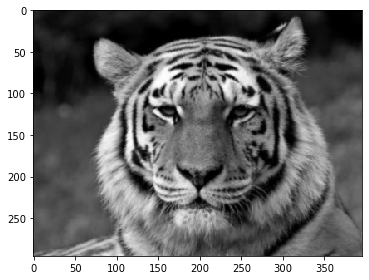

In [10]:
imshow(filtered)

task: https://stepik.org/lesson/61037/step/12

In [11]:
kernel = 0.1 * np.array((
    (-1, -2, -1),
    (-2, 22, -2), 
    (-1, -2, -1)
), dtype=float)
task_img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
filtered = np.zeros((task_img.shape[0] - 2, task_img.shape[1] - 2))
for i in range(filtered.shape[0]):
    for j in range(filtered.shape[1]):
        filtered[i, j] += (task_img[i:i+3, j:j+3] * kernel).sum()
filtered = np.clip(filtered, 0.0, 255.0).astype("uint8")

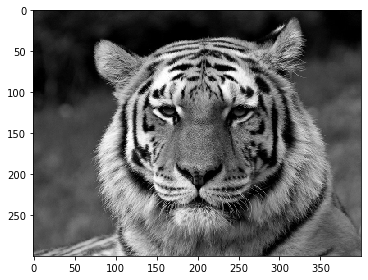

In [12]:
imshow(task_img)

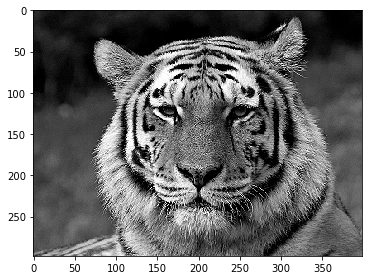

In [13]:
imshow(filtered)

### Median filter

task: https://stepik.org/lesson/61041/step/2

In [14]:
task_img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
filtered = np.zeros((task_img.shape[0] - 6, task_img.shape[1] - 6))
for i in range(filtered.shape[0]):
    for j in range(filtered.shape[1]):
        filtered[i, j] += np.median(task_img[i:i+7, j:j+7])
filtered = np.clip(filtered, 0.0, 255.0).astype("uint8")

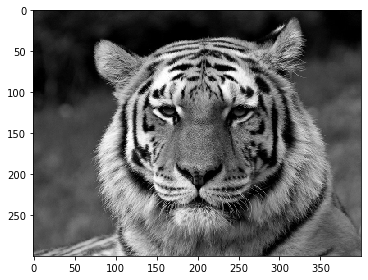

In [15]:
imshow(task_img)

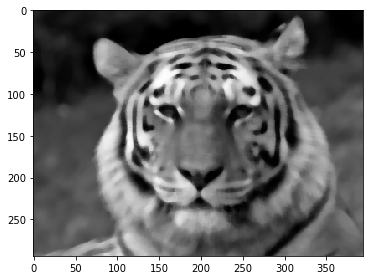

In [16]:
imshow(filtered)